# Churn Modelling

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#np.set_printoptions(threshold=np.inf)
np.set_printoptions(threshold=1000)

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Checking null Values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
x= df.iloc[:,3:-1]
print(type(x))
print(x)

<class 'pandas.core.frame.DataFrame'>
      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActive

In [5]:
y= df.iloc[:,-1]
print(type(y))
print(y)

<class 'pandas.core.series.Series'>
0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


## Class Distribution

Labels- [0 1]
 Counts- [7963 2037]


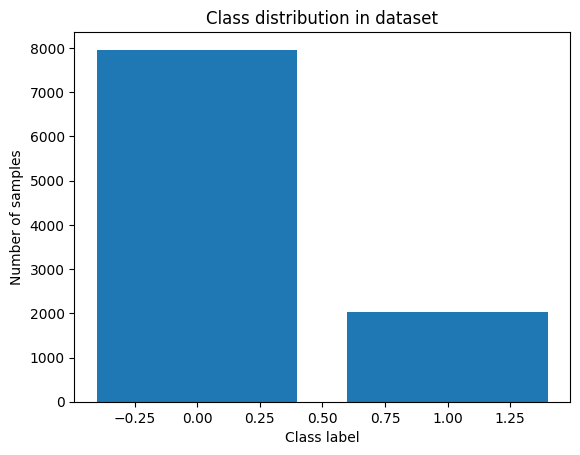

In [6]:
unique_labels, counts = np.unique(y, return_counts=True)
plt.bar (unique_labels , counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
print(f"Labels- {unique_labels}\n Counts- {counts}")
plt.show()

### Encoding Categorical Data

In [7]:
# import libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder

Geography and Gender are categoriacal values <br>
Geography -> Label Encoder or Ordinal Encoder <br>
Gender    -> One Hot Encoder <br>
We can directy use Column transformer apply One Hot Encoder and Ordinal Encoder or we apply One Hot Encoder  and Label Encoder separtately

In [8]:
x2=x

In [9]:
ct = ColumnTransformer(transformers=[('Country',OneHotEncoder(),[1]),('Gender',OrdinalEncoder(),[2])],remainder='passthrough')
x= ct.fit_transform(x)
x

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [10]:
#using Label Encoder
le = LabelEncoder()
x2.iloc[:,2] = le.fit_transform(x2.iloc[:,2])
ct = ColumnTransformer(transformers=[('Country',OneHotEncoder(),[1])],remainder='passthrough')
x2= ct.fit_transform(x2)
x2

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)


OrdinalEncoder is for 2D data with the shape (n_samples, n_features)<br>
LabelEncoder is for 1D data with the shape (n_samples,)<br><br>

Oridnal Enoder - The features are converted to ordinal integers,single column of integers (0 to n_categories - 1) per feature.<br>
Label Encoder - Encode target labels with value between 0 and n_classes-1.

In [11]:
# Avoiding Dummy variable Trap
x=x[:,1:]

### Spliting The Datatset

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Feature Scaling


In [13]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Building Neural Network

In [14]:
import tensorflow as tf

tf.__version__

'2.13.0'

In [15]:
# Initialize the ANN and add Input layer

nn = tf.keras.Sequential()
nn.add(tf.keras.layers.Input(shape=11))

In [16]:
# Adding Hidden Layers
nn.add(tf.keras.layers.Dense(units=7,activation='relu',kernel_initializer='glorot_uniform'))
# Dropout regularization
nn.add(tf.keras.layers.Dropout(rate=0.1))
nn.add(tf.keras.layers.Dense(units=5,activation='relu'))
nn.add(tf.keras.layers.Dropout(rate=0.1))

In [17]:
# Adding Output Layer
nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 84        
                                                                 
 dropout (Dropout)           (None, 7)                 0         
                                                                 
 dense_1 (Dense)             (None, 5)                 40        
                                                                 
 dropout_1 (Dropout)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 130 (520.00 Byte)
Trainable params: 130 (520.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Comiling the Neural Network
nn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
nn.layers

In [22]:
es=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=7,restore_best_weights=True)
# Fitting The model on Training set
nn.fit(x_train,y_train,batch_size=20,epochs=50,callbacks=es)

Epoch 1/50


400/400 [==============================] - 2s 4ms/step - loss: 0.3612 - accuracy: 0.8529
Epoch 2/50
400/400 [==============================] - 2s 4ms/step - loss: 0.3609 - accuracy: 0.8545
Epoch 3/50
400/400 [==============================] - 1s 3ms/step - loss: 0.3648 - accuracy: 0.8503
Epoch 4/50
400/400 [==============================] - 1s 2ms/step - loss: 0.3635 - accuracy: 0.8544
Epoch 5/50
400/400 [==============================] - 1s 3ms/step - loss: 0.3609 - accuracy: 0.8515
Epoch 6/50
400/400 [==============================] - 1s 4ms/step - loss: 0.3646 - accuracy: 0.8520
Epoch 7/50
400/400 [==============================] - 1s 3ms/step - loss: 0.3623 - accuracy: 0.8518
Epoch 8/50
400/400 [==============================] - 1s 2ms/step - loss: 0.3624 - accuracy: 0.8536
Epoch 9/50
400/400 [==============================] - 1s 2ms/step - loss: 0.3650 - accuracy: 0.8479
Epoch 10/50
400/400 [==============================] - 2s 4ms/step - loss: 0.3608 - accuracy: 0.8535
Epoch 11/5

In [23]:
pd.DataFrame(nn.history.history)

,loss,accuracy
0,0.361187,0.852875
1,0.360908,0.854500
2,0.364813,0.850250
3,0.363520,0.854375
4,0.360878,0.851500
5,0.364632,0.852000
6,0.362291,0.851750
7,0.362447,0.853625
8,0.365001,0.847875
9,0.360753,0.853500


### Predictions

In [24]:
y_score= nn.predict(x_test)
y_score

63/63 [==============================] - 0s 4ms/step


array([[0.24002723],
       [0.32454482],
       [0.17749555],
       ...,
       [0.23141386],
       [0.15918864],
       [0.2043885 ]], dtype=float32)

## ROC Curve

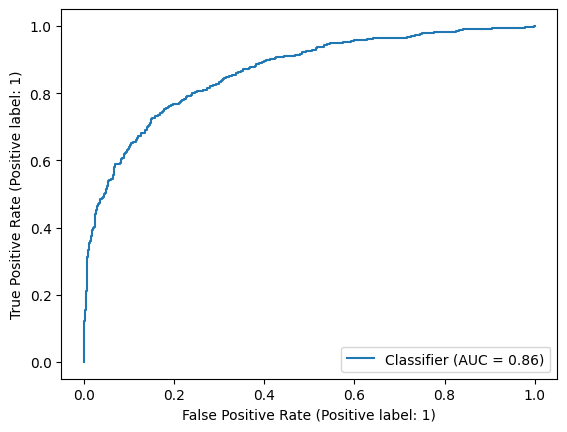

In [25]:
from sklearn.metrics import roc_curve,RocCurveDisplay
RocCurveDisplay.from_predictions(y_true=y_test,y_pred=y_score)

In [26]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds = roc_curve(y_true=y_test,y_score=y_score)
nn_auc_score = roc_auc_score(y_true=y_test,y_score=y_score)
print(f'AUC -> {nn_auc_score}')

AUC -> 0.8636046286620999


### Youden's J Statistic for Threshold Determination
J = Sensitivity + Specificity – 1

J = Sensitivity + (1 – FalsePositiveRate) – 1

J = TruePositiveRate – FalsePositiveRate

Goal is to get - > Maximum TPR and Minimum FPR

In [27]:
idx = np.argmax(tpr - fpr) 
print(f" thrshold is {thresholds[idx]} and fpr is {fpr[idx]} and tpr is {tpr[idx]}")

 thrshold is 0.25654131174087524 and fpr is 0.15047021943573669 and tpr is 0.725925925925926


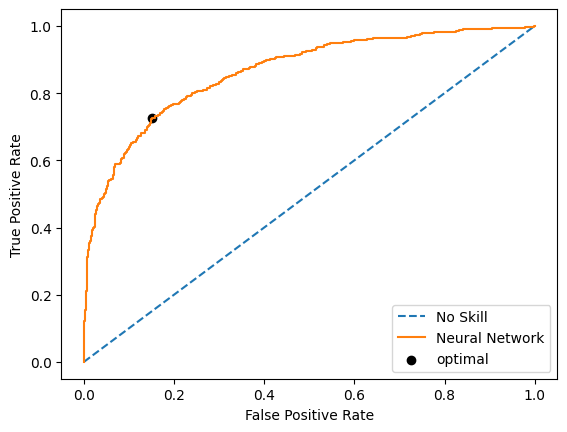

In [28]:
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Neural Network')
plt.scatter(fpr[idx], tpr[idx], marker='o', color='black', label='optimal')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

## Accuracy

In [29]:
from sklearn.metrics import accuracy_score

accuracies =[]
for i in thresholds:
    y_z =( y_score>i).astype(int)
    accuracies.append(accuracy_score(y_test,y_z))
print(accuracies)

[0.7975, 0.7975, 0.8165, 0.817, 0.821, 0.821, 0.8255, 0.826, 0.8255, 0.826, 0.8255, 0.826, 0.826, 0.8265, 0.828, 0.8285, 0.8345, 0.835, 0.8355, 0.836, 0.8495, 0.85, 0.851, 0.8515, 0.8515, 0.852, 0.8535, 0.854, 0.854, 0.8545, 0.856, 0.8565, 0.8565, 0.857, 0.8565, 0.857, 0.8585, 0.8585, 0.8585, 0.859, 0.8595, 0.8585, 0.8595, 0.8595, 0.8595, 0.86, 0.8595, 0.86, 0.8595, 0.86, 0.8615, 0.862, 0.8615, 0.861, 0.861, 0.861, 0.8605, 0.8605, 0.8625, 0.863, 0.8625, 0.863, 0.8655, 0.866, 0.8655, 0.866, 0.866, 0.8665, 0.866, 0.8665, 0.8665, 0.867, 0.867, 0.8675, 0.868, 0.867, 0.8665, 0.867, 0.8665, 0.867, 0.8665, 0.8655, 0.8655, 0.866, 0.8665, 0.8635, 0.863, 0.863, 0.8625, 0.8625, 0.862, 0.8625, 0.862, 0.8625, 0.862, 0.8625, 0.862, 0.862, 0.8615, 0.8615, 0.861, 0.8615, 0.861, 0.861, 0.861, 0.8615, 0.861, 0.8615, 0.861, 0.8615, 0.8615, 0.862, 0.8615, 0.8615, 0.861, 0.861, 0.8625, 0.862, 0.8615, 0.86, 0.8595, 0.86, 0.8595, 0.8575, 0.858, 0.8585, 0.858, 0.858, 0.8585, 0.859, 0.859, 0.8595, 0.8605, 0.86

In [30]:
idx=np.argmax(accuracies)
print(f"optimal threshold is {thresholds[idx]}")

optimal threshold is 0.5490283370018005


In [31]:
from sklearn.metrics import confusion_matrix
y_pred = ( y_score > thresholds[idx]).astype(int)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(f'Accuracy -> {accuracy_score(y_test,y_pred)}')

[[1549   46]
 [ 218  187]]
Accuracy -> 0.868


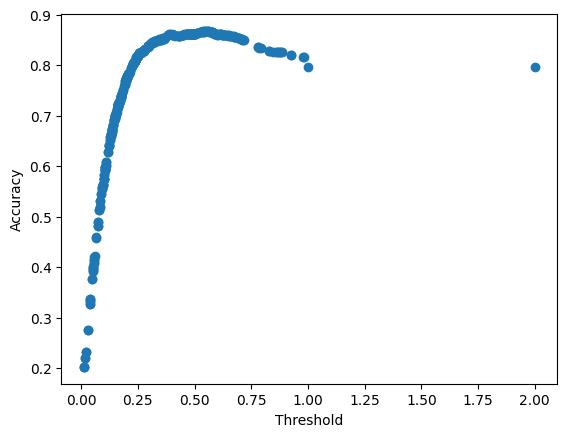

In [32]:
plt.scatter(thresholds,accuracies)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.show()

### Choosing threshold is more of business problem, your desired goal.

## Single Prediction
#### use model to predict the specific person with some details<br>
    Geography: France
    Credit Score: 600
    Gender: Male
    Age: 40 years old
    Tenure: 3 years
    Balance: $60000
    Number of Products: 2
    Does this customer have a credit card ? Yes
    Is this customer an Active Member: Yes 
    Estimated Salary: $50000

In [33]:
'''
France code  is 0,0 after encoding and removing dummy varibale
'''
obs=np.array([0,0,1,700,40,3,0,2,1,1,50000]).reshape(1,11)
obs

array([[    0,     0,     1,   700,    40,     3,     0,     2,     1,
            1, 50000]])

In [34]:
new_pred = nn.predict(sc.transform(obs))
new_pred

1/1 [==============================] - 0s 62ms/step


array([[0.03784097]], dtype=float32)